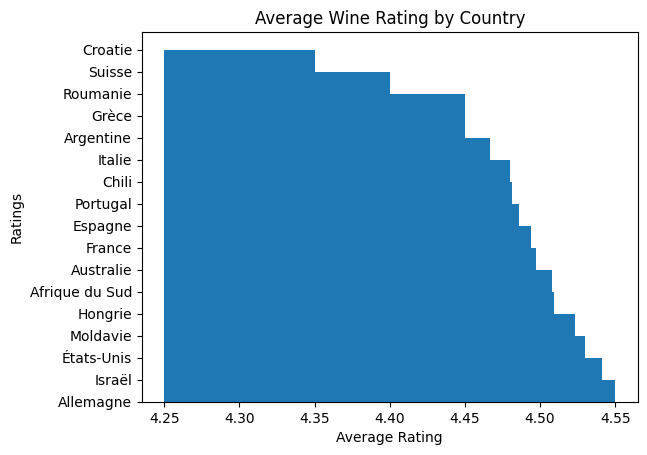

In [11]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to your database
conn = sqlite3.connect('vivino.db')
cursor = conn.cursor()

# Execute your SQL query
cursor.execute('SELECT countries.name AS country, regions.country_code, ROUND(AVG(wines.ratings_average), 3) AS avg_rating FROM wines JOIN regions ON wines.region_id = regions.id JOIN countries ON countries.code = regions.country_code GROUP BY regions.country_code, countries.name ORDER BY avg_rating DESC;')
data = cursor.fetchall()

# Extract the data into separate lists
countries = [row[0] for row in data]
avg_ratings = [row[2]  for row in data]

# Create a bar chart using matplotlib
plt.bar(avg_ratings ,countries, width=0.1)
plt.title('Average Wine Rating by Country')
plt.xlabel('Average Rating')
plt.ylabel('Ratings')

plt.show()



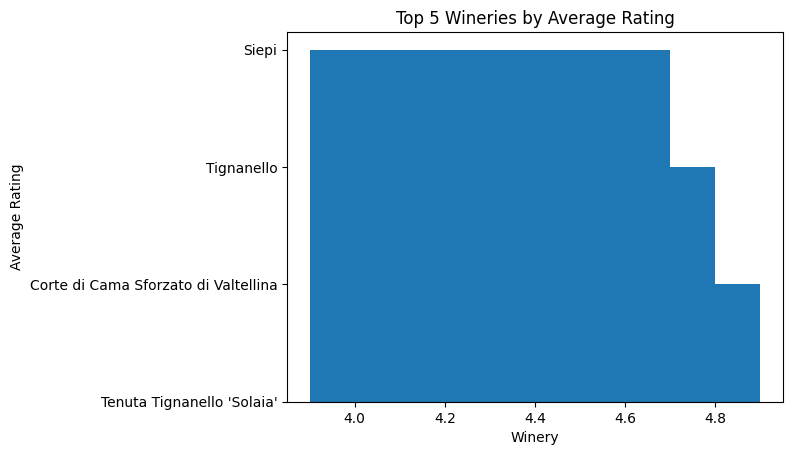

In [13]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to your database
conn = sqlite3.connect('vivino.db')
cursor = conn.cursor()

# Execute your SQL query
cursor.execute('SELECT wineries.name, AVG(wines.ratings_average) AS winery_avg FROM wines INNER JOIN wineries ON wines.winery_id = wineries.id GROUP BY wineries.name ORDER BY winery_avg DESC LIMIT 5;')
data = cursor.fetchall()

# Extract the data into separate lists
wineries = [row[0] for row in data]
avg_ratings = [row[1] for row in data]

# Create a bar chart using matplotlib
plt.bar(avg_ratings, wineries)
plt.title('Top 5 Wineries by Average Rating')
plt.xlabel('Winery')
plt.ylabel('Average Rating')

plt.show()


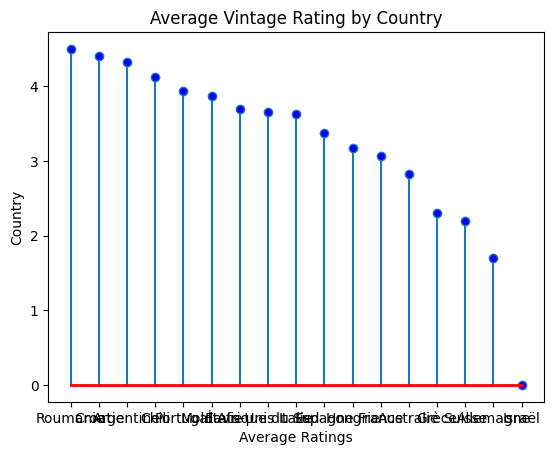

In [36]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to your database
conn = sqlite3.connect('vivino.db')
cursor = conn.cursor()

# Execute your SQL query
cursor.execute('SELECT countries.name AS country, ROUND(AVG(vintages.ratings_average),2) AS vint_rtng_avg FROM vintages JOIN wines ON vintages.wine_id = wines.id JOIN regions ON wines.region_id = regions.id JOIN countries ON countries.code = regions.country_code GROUP BY country ORDER BY vint_rtng_avg DESC;')
data = cursor.fetchall()

# Extract the data into separate lists
avg_ratings = [row[0] for row in data]
countries = [row[1] for row in data]

# Create a stem plot using matplotlib
markerline, stemlines, baseline = plt.stem( avg_ratings, countries)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color','r', 'linewidth', 2)

plt.title('Average Vintage Rating by Country')
plt.xlabel('Average Ratings')
plt.ylabel('Country')

plt.show()



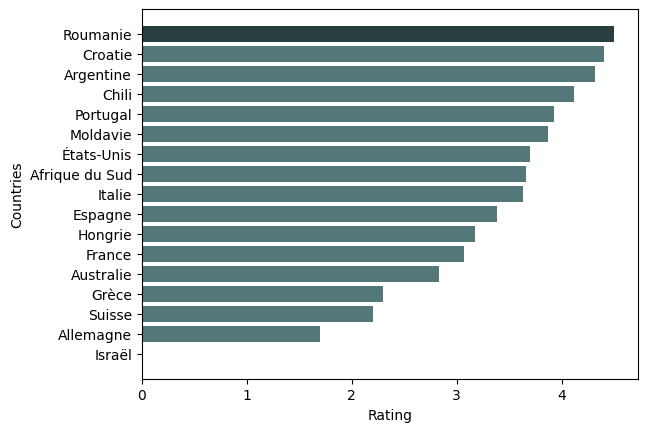

In [57]:
cursor.execute("SELECT countries.name AS country, ROUND(AVG(vintages.ratings_average),2) AS vint_rtng_avg FROM vintages JOIN wines ON vintages.wine_id = wines.id JOIN regions ON wines.region_id = regions.id JOIN countries ON countries.code = regions.country_code GROUP BY country ORDER BY vint_rtng_avg ASC;")

results = cursor.fetchall()

country_values = [row[0] for row in results]
ratings_values = [row[1] for row in results]
max_value = max(ratings_values)

plt.barh(country_values, ratings_values, color = "#52787A")
for i, value in enumerate(ratings_values):
    if value == max_value:
        plt.barh(country_values[i], value, color='#293E3F')

plt.xlabel('Rating')
plt.ylabel('Countries')
#plt.title('Average vintages rating for country')

plt.show()



Text(0, 0.5, 'Countries')

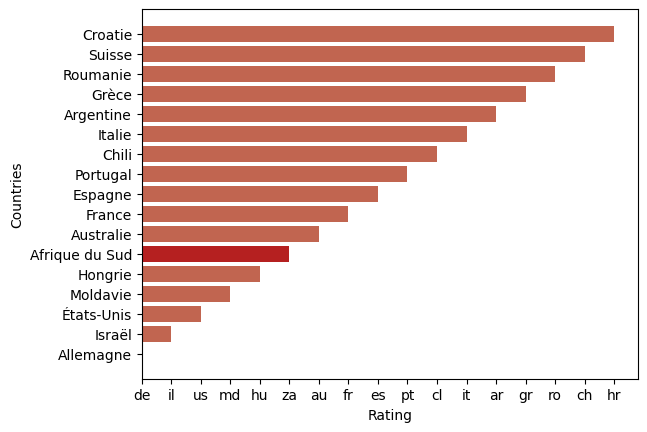

In [56]:
cursor.execute('SELECT countries.name AS country, regions.country_code, ROUND(AVG(wines.ratings_average), 3) AS avg_rating FROM wines JOIN regions ON wines.region_id = regions.id JOIN countries ON countries.code = regions.country_code GROUP BY regions.country_code, countries.name ORDER BY avg_rating DESC;')
column1_values = [row[0] for row in results]
column2_values = [row[1] for row in results]
max_value = max(column2_values)

plt.barh(column1_values, column2_values, color = "#C16550" )
for i, value in enumerate(column2_values):
    if value == max_value:
        plt.barh(column1_values[i], value, color='#B52020')

plt.xlabel('Rating')
plt.ylabel('Countries')
